In [1]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load simulation
parlist, xslist, yslist = [], [], []
for bounds_file in glob.glob("../data/simulData/*_bmBounds.tab"):
    m = re.search(r"/scale(.*)-adip(.*)_bmBounds.tab$", bounds_file)
    scale, adip = [float(x) for x in m.groups()]
    parlist.append((scale, adip))
    ys = np.loadtxt(bounds_file)
    yslist.append(ys)
    intensities_file = re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
    xs = np.loadtxt(intensities_file)
    xslist.append(xs)

In [3]:
# Load real data
raw = np.loadtxt("../data/realData/FS_1334172_layers.csv", delimiter=";")
data = np.transpose(raw)

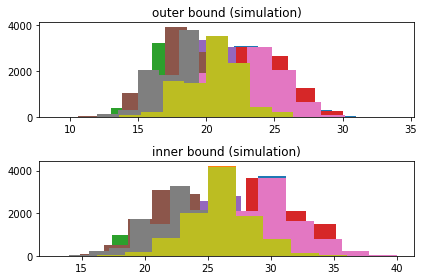

In [4]:
_, (p11, p21) = plt.subplots(2,1)
for ys in yslist:
    p11.hist(ys[:, 0])
p11.set_title("outer bound (simulation)")
for ys in yslist:
    p21.hist(ys[:, 1])  
p21.set_title("inner bound (simulation)")
plt.tight_layout()
plt.show()

In [5]:
# Summed intensities

<BarContainer object of 40 artists>

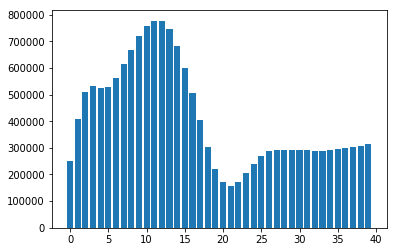

In [6]:
plt.bar(range(40), np.sum(data, axis=0))

<BarContainer object of 40 artists>

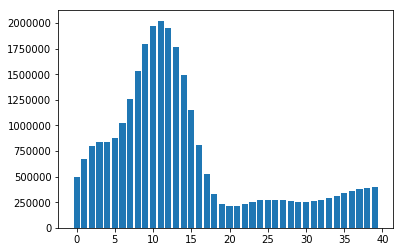

In [7]:
plt.bar(range(40), np.sum(xslist[0], axis=0))

In [8]:
# Filtered real data
data_filtered = data[np.sum(data, axis=1) > 300, :]

In [9]:
dropped = data.shape[0]-data_filtered.shape[0]
print("Number of rows with no intensity discarded:", dropped, "(", dropped / data.shape[0], "%)")

Number of rows with no intensity discarded: 4448 ( 0.43429017769966805 %)


In [10]:
# An element of the bounds
yslist[0][0]

array([22., 30.])

In [18]:
all_ys = np.concatenate(yslist)
bounds_length = all_ys[:,1] + 1 - all_ys[:,0]
bc = np.bincount(bounds_length)
plt.bar(range(len(bc)), bc)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'